In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
files = [name for name in os.listdir("/content/drive/MyDrive/IDA nov 15/Bearing2_1")]

In [ ]:
import os
import pandas as pd # Import the pandas library and assign it to the alias 'pd'

files = [name for name in os.listdir("/content/drive/MyDrive/IDA nov 15/Bearing2_1")]

df_acc = {}
df_temp = {}
for i, f in enumerate(files):
  if (f[0] == "a"):
    num = f[4:9]
    df_acc[f"{num}"] = pd.read_csv(f"/content/drive/MyDrive/IDA nov 15/Bearing2_1/{f}", header=None)
  else:
    num = f[5:10]
    df_temp[f"{num}"] = pd.read_csv(f"/content/drive/MyDrive/IDA nov 15/Bearing2_1/{f}", header=None)

In [ ]:
# Dictionaries to store DataFrames for acceleration and temperature files
df_acc = {}
df_temp = {}

# Loop through all files in the directory
for i, f in enumerate(files):
    # Check if the file is an acceleration file based on its initial character
    if f[0] == "a":
        # Extract the identifier number from the filename (characters at position 4 to 8)
        num = f[4:9]
        # Read the CSV file into a DataFrame and store it in df_acc dictionary
        df_acc[f"{num}"] = pd.read_csv(f"/content/drive/MyDrive/IDA nov 15/Bearing2_1/{f}", header=None)

        # Display information about the current file being processed
        print(f"Processing acceleration file: {f}")
        print(f"Identifier: {num}")
        print(f"Data stored in df_acc[{num}]\n")

    else:
        # Extract the identifier number from the filename (characters at position 5 to 9)
        num = f[5:10]
        # Read the CSV file into a DataFrame and store it in df_temp dictionary
        df_temp[f"{num}"] = pd.read_csv(f"/content/drive/MyDrive/IDA nov 15/Bearing2_1/{f}", header=None)

        # Display information about the current file being processed
        print(f"Processing temperature file: {f}")
        print(f"Identifier: {num}")
        print(f"Data stored in df_temp[{num}]\n")


Processing acceleration file: acc_00073.csv
Identifier: 00073
Data stored in df_acc[00073]

Processing acceleration file: acc_00068.csv
Identifier: 00068
Data stored in df_acc[00068]

Processing acceleration file: acc_00070.csv
Identifier: 00070
Data stored in df_acc[00070]

Processing acceleration file: acc_00076.csv
Identifier: 00076
Data stored in df_acc[00076]

Processing acceleration file: acc_00063.csv
Identifier: 00063
Data stored in df_acc[00063]

Processing acceleration file: acc_00080.csv
Identifier: 00080
Data stored in df_acc[00080]

Processing acceleration file: acc_00078.csv
Identifier: 00078
Data stored in df_acc[00078]

Processing acceleration file: acc_00069.csv
Identifier: 00069
Data stored in df_acc[00069]

Processing acceleration file: acc_00089.csv
Identifier: 00089
Data stored in df_acc[00089]

Processing acceleration file: acc_00101.csv
Identifier: 00101
Data stored in df_acc[00101]

Processing acceleration file: acc_00096.csv
Identifier: 00096
Data stored in df_

In [ ]:
import pandas as pd
import numpy as np

# Function to calculate statistics
def calculate_statistics(df, file_name):
    torque = df.iloc[:, 3]  # 4th column
    x_vibration = df.iloc[:, 4]  # 5th column
    y_vibration = df.iloc[:, 5]  # 6th column

    stats = {
        'file_name': file_name,



        'x_vibration_max': x_vibration.max(),
        'x_vibration_min': x_vibration.min(),

        'x_vibration_rms': np.sqrt(np.mean(x_vibration**2)),


        'y_vibration_max': y_vibration.max(),
        'y_vibration_min': y_vibration.min(),

        'y_vibration_rms': np.sqrt(np.mean(y_vibration**2))
    }
    return stats

# Combine and sort file statistics in a list
all_stats = []

# Loop through all files in df_acc dictionary, process and store statistics
for file_name in sorted(df_acc.keys(), key=lambda x: int(x)):
    stats = calculate_statistics(df_acc[file_name], file_name)
    all_stats.append(stats)

# Convert the list of dictionaries to a DataFrame for easier viewing
stats_df = pd.DataFrame(all_stats)

# Display the statistics DataFrame
print(stats_df)






    file_name  x_vibration_max  x_vibration_min  x_vibration_rms  \
0       00001            1.772           -1.521         0.509435   
1       00002            1.789           -1.692         0.460284   
2       00003            1.386           -2.131         0.453499   
3       00004            2.126           -1.572         0.503595   
4       00005            1.510           -2.023         0.464142   
..        ...              ...              ...              ...   
906     00907           20.389          -20.202         2.498659   
907     00908           13.847          -19.082         2.280616   
908     00909           16.157          -19.078         2.208037   
909     00910           12.587          -17.692         2.194001   
910     00911           15.583          -19.025         2.374141   

     y_vibration_max  y_vibration_min  y_vibration_rms  
0              0.861           -1.040         0.262582  
1              1.016           -0.926         0.281742  
2           

In [ ]:
# First, ensure the DataFrame is sorted by file names in ascending order (numerically or lexicographically)
df1 = stats_df.sort_values(by='file_name')

# Calculate RUL as (total number of files - current file's index) * 10 seconds
total_files = len(df1)
df1['RUL'] = [(total_files - (i + 1)) * 10 for i in range(total_files)]

# Now the RUL column is added as the 7th column in the DataFrame
# Display the updated DataFrame
print(df1)

    file_name  x_vibration_max  x_vibration_min  x_vibration_rms  \
0       00001            1.772           -1.521         0.509435   
1       00002            1.789           -1.692         0.460284   
2       00003            1.386           -2.131         0.453499   
3       00004            2.126           -1.572         0.503595   
4       00005            1.510           -2.023         0.464142   
..        ...              ...              ...              ...   
906     00907           20.389          -20.202         2.498659   
907     00908           13.847          -19.082         2.280616   
908     00909           16.157          -19.078         2.208037   
909     00910           12.587          -17.692         2.194001   
910     00911           15.583          -19.025         2.374141   

     y_vibration_max  y_vibration_min  y_vibration_rms   RUL  
0              0.861           -1.040         0.262582  9100  
1              1.016           -0.926         0.281742  9

In [ ]:
import os
files = [name for name in os.listdir("/content/drive/MyDrive/IDA nov 15/Bearing2_2")]

In [ ]:
df_acc_1 = {}
df_temp_1 = {}
for i, f in enumerate(files):
  if (f[0] == "a"):
    num = f[4:9]
    df_acc_1[f"{num}"] = pd.read_csv(f"/content/drive/MyDrive/IDA nov 15/Bearing2_2/{f}", header=None)
  else:
    num = f[5:10]
    df_temp_1[f"{num}"] = pd.read_csv(f"/content/drive/MyDrive/IDA nov 15/Bearing2_2/{f}", header=None)

In [ ]:
# Dictionaries to store DataFrames for acceleration and temperature files
df_acc = {}
df_temp = {}

# Loop through all files in the directory
for i, f in enumerate(files):
    # Check if the file is an acceleration file based on its initial character
    if f[0] == "a":
        # Extract the identifier number from the filename (characters at position 4 to 8)
        num = f[4:9]
        # Read the CSV file into a DataFrame and store it in df_acc dictionary
        df_acc[f"{num}"] = pd.read_csv(f"/content/drive/MyDrive/IDA nov 15/Bearing2_2/{f}", header=None)

        # Display information about the current file being processed
        print(f"Processing acceleration file: {f}")
        print(f"Identifier: {num}")
        print(f"Data stored in df_acc[{num}]\n")

    else:
        # Extract the identifier number from the filename (characters at position 5 to 9)
        num = f[5:10]
        # Read the CSV file into a DataFrame and store it in df_temp dictionary
        df_temp[f"{num}"] = pd.read_csv(f"/content/drive/MyDrive/IDA nov 15/Bearing2_2/{f}", header=None)

        # Display information about the current file being processed
        print(f"Processing temperature file: {f}")
        print(f"Identifier: {num}")
        print(f"Data stored in df_temp[{num}]\n")

Processing acceleration file: acc_00001.csv
Identifier: 00001
Data stored in df_acc[00001]

Processing acceleration file: acc_00002.csv
Identifier: 00002
Data stored in df_acc[00002]

Processing acceleration file: acc_00006.csv
Identifier: 00006
Data stored in df_acc[00006]

Processing acceleration file: acc_00019.csv
Identifier: 00019
Data stored in df_acc[00019]

Processing acceleration file: acc_00017.csv
Identifier: 00017
Data stored in df_acc[00017]

Processing acceleration file: acc_00013.csv
Identifier: 00013
Data stored in df_acc[00013]

Processing acceleration file: acc_00007.csv
Identifier: 00007
Data stored in df_acc[00007]

Processing acceleration file: acc_00014.csv
Identifier: 00014
Data stored in df_acc[00014]

Processing acceleration file: acc_00004.csv
Identifier: 00004
Data stored in df_acc[00004]

Processing acceleration file: acc_00009.csv
Identifier: 00009
Data stored in df_acc[00009]

Processing acceleration file: acc_00016.csv
Identifier: 00016
Data stored in df_

In [ ]:
import pandas as pd
import numpy as np

# Function to calculate statistics
def calculate_statistics(df, file_name):
    x_vibration = df.iloc[:, 4]  # 5th column
    y_vibration = df.iloc[:, 5]  # 6th column

    stats = {
        'file_name': file_name,
        'x_vibration_max': x_vibration.max(),
        'x_vibration_min': x_vibration.min(),
        'x_vibration_rms': np.sqrt(np.mean(x_vibration**2)),

        'y_vibration_max': y_vibration.max(),
        'y_vibration_min': y_vibration.min(),
        'y_vibration_rms': np.sqrt(np.mean(y_vibration**2))
    }
    return stats

# Combine and sort file statistics in a list
all_stats = []

# Loop through all files in df_acc dictionary, process and store statistics
for file_name in sorted(df_acc.keys(), key=lambda x: int(x)):
    stats = calculate_statistics(df_acc[file_name], file_name)
    all_stats.append(stats)

# Convert the list of dictionaries to a DataFrame for easier viewing
df2 = pd.DataFrame(all_stats)

# Display the statistics DataFrame
print(df2)



    file_name  x_vibration_max  x_vibration_min  x_vibration_rms  \
0       00001            1.242           -1.039         0.280177   
1       00002            0.871           -0.890         0.253020   
2       00003            0.987           -0.849         0.261389   
3       00004            1.011           -1.089         0.286874   
4       00005            1.002           -1.149         0.294228   
..        ...              ...              ...              ...   
792     00793            5.055          -13.954         1.521488   
793     00794           10.724          -23.485         1.974434   
794     00795            4.409          -14.352         1.574786   
795     00796            4.687          -20.038         1.599742   
796     00797            6.158          -17.655         1.962847   

     y_vibration_max  y_vibration_min  y_vibration_rms  
0              0.556           -0.681         0.189614  
1              0.813           -0.686         0.202453  
2           

In [ ]:
# First, ensure the DataFrame is sorted by file names in ascending order (numerically or lexicographically)
df2 = df2.sort_values(by='file_name')

# Calculate RUL as (total number of files - current file's index) * 10 seconds
total_files = len(df2)
df2['RUL'] = [(total_files - (i + 1)) * 10 for i in range(total_files)]

# Now the RUL column is added as the 7th column in the DataFrame
# Display the updated DataFrame
print(df2)

    file_name  x_vibration_max  x_vibration_min  x_vibration_rms  \
0       00001            1.242           -1.039         0.280177   
1       00002            0.871           -0.890         0.253020   
2       00003            0.987           -0.849         0.261389   
3       00004            1.011           -1.089         0.286874   
4       00005            1.002           -1.149         0.294228   
..        ...              ...              ...              ...   
792     00793            5.055          -13.954         1.521488   
793     00794           10.724          -23.485         1.974434   
794     00795            4.409          -14.352         1.574786   
795     00796            4.687          -20.038         1.599742   
796     00797            6.158          -17.655         1.962847   

     y_vibration_max  y_vibration_min  y_vibration_rms   RUL  
0              0.556           -0.681         0.189614  7960  
1              0.813           -0.686         0.202453  7

In [ ]:
# List of DataFrames to process
data_frames = [df1, df2]  # Add all your DataFrames to this list

# Loop over each DataFrame in the list
for idx, df in enumerate(data_frames):
    print(f"Processing DataFrame {idx + 1}")

    # Process each row in the current DataFrame
    for index, row in df.iterrows():
        # Replace the line below with your processing code
        print(f"Processing row {index} in DataFrame {idx + 1}")
        # Example: Accessing data in the current row
        # row['column_name'] or row[0] (for numeric indexing)

    print(f"Completed DataFrame {idx + 1}\n")



Processing DataFrame 1
Processing row 0 in DataFrame 1
Processing row 1 in DataFrame 1
Processing row 2 in DataFrame 1
Processing row 3 in DataFrame 1
Processing row 4 in DataFrame 1
Processing row 5 in DataFrame 1
Processing row 6 in DataFrame 1
Processing row 7 in DataFrame 1
Processing row 8 in DataFrame 1
Processing row 9 in DataFrame 1
Processing row 10 in DataFrame 1
Processing row 11 in DataFrame 1
Processing row 12 in DataFrame 1
Processing row 13 in DataFrame 1
Processing row 14 in DataFrame 1
Processing row 15 in DataFrame 1
Processing row 16 in DataFrame 1
Processing row 17 in DataFrame 1
Processing row 18 in DataFrame 1
Processing row 19 in DataFrame 1
Processing row 20 in DataFrame 1
Processing row 21 in DataFrame 1
Processing row 22 in DataFrame 1
Processing row 23 in DataFrame 1
Processing row 24 in DataFrame 1
Processing row 25 in DataFrame 1
Processing row 26 in DataFrame 1
Processing row 27 in DataFrame 1
Processing row 28 in DataFrame 1
Processing row 29 in DataFrame

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Combine all DataFrames into one
data_frames = [df1, df2]  # Add your DataFrames here
combined_df = pd.concat(data_frames, ignore_index=True)

# Define features and target
X = combined_df.iloc[:, 1:7]  # Columns 2 to 7 (index 1 to 6 in Python)
y = combined_df.iloc[:, 7]    # Column 8 (index 7 in Python)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

print("Random Forest model trained successfully!")




Random Forest model trained successfully!


In [ ]:
import os
files = [name for name in os.listdir("/content/drive/MyDrive/IDA nov 15/Bearing2_3")]

In [ ]:
df_acc_2 = {}
df_temp_2 = {}
for i, f in enumerate(files):
  if (f[0] == "a"):
    num = f[4:9]
    df_acc_2[f"{num}"] = pd.read_csv(f"/content/drive/MyDrive/IDA nov 15/Bearing2_3/{f}", header=None)
  else:
    num = f[5:10]
    df_temp_2[f"{num}"] = pd.read_csv(f"/content/drive/MyDrive/IDA nov 15/Bearing2_3/{f}", header=None)

In [ ]:
# Dictionaries to store DataFrames for acceleration and temperature files
df_acc_2= {}
df_temp_2= {}

# Loop through all files in the directory
for i, f in enumerate(files):
    # Check if the file is an acceleration file based on its initial character
    if f[0] == "a":
        # Extract the identifier number from the filename (characters at position 4 to 8)
        num = f[4:9]
        # Read the CSV file into a DataFrame and store it in df_acc dictionary
        df_acc_2[f"{num}"] = pd.read_csv(f"/content/drive/MyDrive/IDA nov 15/Bearing2_3/{f}", header=None)

        # Display information about the current file being processed
        print(f"Processing acceleration file: {f}")
        print(f"Identifier: {num}")
        print(f"Data stored in df_acc[{num}]\n")

    else:
        # Extract the identifier number from the filename (characters at position 5 to 9)
        num = f[5:10]
        # Read the CSV file into a DataFrame and store it in df_temp dictionary
        df_temp_2[f"{num}"] = pd.read_csv(f"/content/drive/MyDrive/IDA nov 15/Bearing2_3/{f}", header=None)

        # Display information about the current file being processed
        print(f"Processing temperature file: {f}")
        print(f"Identifier: {num}")
        print(f"Data stored in df_temp[{num}]\n")

Processing acceleration file: acc_00019.csv
Identifier: 00019
Data stored in df_acc[00019]

Processing acceleration file: acc_00021.csv
Identifier: 00021
Data stored in df_acc[00021]

Processing acceleration file: acc_00014.csv
Identifier: 00014
Data stored in df_acc[00014]

Processing acceleration file: acc_00003.csv
Identifier: 00003
Data stored in df_acc[00003]

Processing acceleration file: acc_00024.csv
Identifier: 00024
Data stored in df_acc[00024]

Processing acceleration file: acc_00007.csv
Identifier: 00007
Data stored in df_acc[00007]

Processing acceleration file: acc_00012.csv
Identifier: 00012
Data stored in df_acc[00012]

Processing acceleration file: acc_00008.csv
Identifier: 00008
Data stored in df_acc[00008]

Processing acceleration file: acc_00006.csv
Identifier: 00006
Data stored in df_acc[00006]

Processing acceleration file: acc_00005.csv
Identifier: 00005
Data stored in df_acc[00005]

Processing acceleration file: acc_00025.csv
Identifier: 00025
Data stored in df_

In [ ]:
import pandas as pd
import numpy as np

# Function to calculate statistics
def calculate_statistics(df, file_name):
    x_vibration = df.iloc[:, 4]  # 5th column
    y_vibration = df.iloc[:, 5]  # 6th column

    stats = {
        'file_name': file_name,
        'x_vibration_max': x_vibration.max(),
        'x_vibration_min': x_vibration.min(),
        'x_vibration_rms': np.sqrt(np.mean(x_vibration**2)),

        'y_vibration_max': y_vibration.max(),
        'y_vibration_min': y_vibration.min(),
        'y_vibration_rms': np.sqrt(np.mean(y_vibration**2))
    }
    return stats

# Combine and sort file statistics in a list
all_stats = []

# Loop through all files in df_acc dictionary, process and store statistics
for file_name in sorted(df_acc_2.keys(), key=lambda x: int(x)):
    stats = calculate_statistics(df_acc_2[file_name], file_name)
    all_stats.append(stats)

# Convert the list of dictionaries to a DataFrame for easier viewing
df3 = pd.DataFrame(all_stats)

# Display the statistics DataFrame
print(df3)

    file_name  x_vibration_max  x_vibration_min  x_vibration_rms  \
0       00001            1.438           -1.504         0.430572   
1       00002            2.189           -2.306         0.448673   
2       00003            1.381           -1.937         0.414076   
3       00004            1.348           -1.644         0.390122   
4       00005            1.198           -1.316         0.333500   
..        ...              ...              ...              ...   
379     01116            4.157           -4.317         0.325348   
380     01117            1.108           -0.810         0.262751   
381     01118            0.842           -0.969         0.252232   
382     01119            1.082           -1.123         0.264694   
383     01120            0.885           -0.984         0.260909   

     y_vibration_max  y_vibration_min  y_vibration_rms  
0              0.988           -0.979         0.251058  
1              1.182           -0.918         0.260578  
2           

In [ ]:
# Assuming `test_df` is the new DataFrame to test with

# Extract features from the test DataFrame
X_test = df3.iloc[:, 1:7]  # Columns 2 to 7 (index 1 to 6 in Python)

# Predict using the trained model
y_pred = model.predict(X_test)

# Add the predictions as a new column to the test DataFrame
df3['Predicted_RUL'] = y_pred

print(df3)


    file_name  x_vibration_max  x_vibration_min  x_vibration_rms  \
0       00001            1.438           -1.504         0.430572   
1       00002            2.189           -2.306         0.448673   
2       00003            1.381           -1.937         0.414076   
3       00004            1.348           -1.644         0.390122   
4       00005            1.198           -1.316         0.333500   
..        ...              ...              ...              ...   
379     01116            4.157           -4.317         0.325348   
380     01117            1.108           -0.810         0.262751   
381     01118            0.842           -0.969         0.252232   
382     01119            1.082           -1.123         0.264694   
383     01120            0.885           -0.984         0.260909   

     y_vibration_max  y_vibration_min  y_vibration_rms  Predicted_RUL  
0              0.988           -0.979         0.251058         9012.2  
1              1.182           -0.918  

In [ ]:
import pandas as pd
from google.colab import files

# ... (your existing code) ...

# Save the DataFrame to a CSV file
df3.to_csv('df3.csv', index=False)  # index=False prevents saving the index

# Download the saved file
files.download('df3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

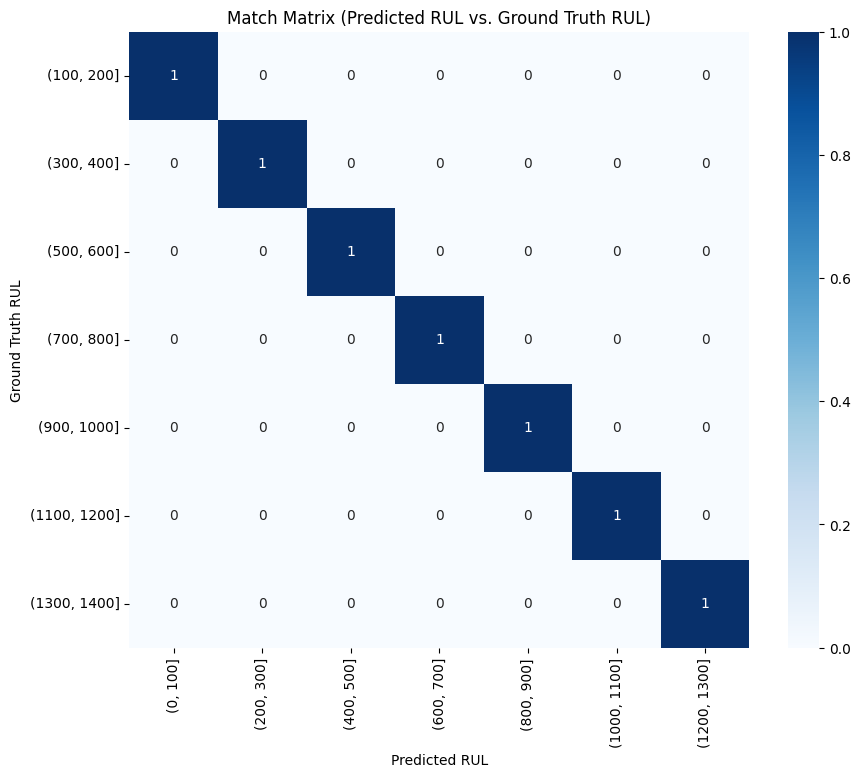

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Provided Data
data = {
    "Bearing": ["Bearing 1_3"] * 7,
    "Prediction Cycle": [501, 721, 921, 1121, 1321, 1521, 1721],
    "Predicted RUL": [1260.9, 1060.9, 845.1, 636.4, 426.5, 217.3, 8],
    "Ground Truth RUL": [1302, 1102, 902, 702, 502, 302, 102]
}

df = pd.DataFrame(data)

# Define tolerance for a match
tolerance = 50

# Create bins for the match matrix
bins = range(0, 1600, 100)  # Bins for RUL values
df["Predicted Bin"] = pd.cut(df["Predicted RUL"], bins)
df["Ground Truth Bin"] = pd.cut(df["Ground Truth RUL"], bins)

# Create a pivot table (match matrix)
match_matrix = pd.crosstab(df["Ground Truth Bin"], df["Predicted Bin"])

# Visualization of the match matrix
plt.figure(figsize=(10, 8))
sns.heatmap(match_matrix, annot=True, cmap="Blues", fmt="d", cbar=True)
plt.title("Match Matrix (Predicted RUL vs. Ground Truth RUL)")
plt.xlabel("Predicted RUL")
plt.ylabel("Ground Truth RUL")
plt.show()



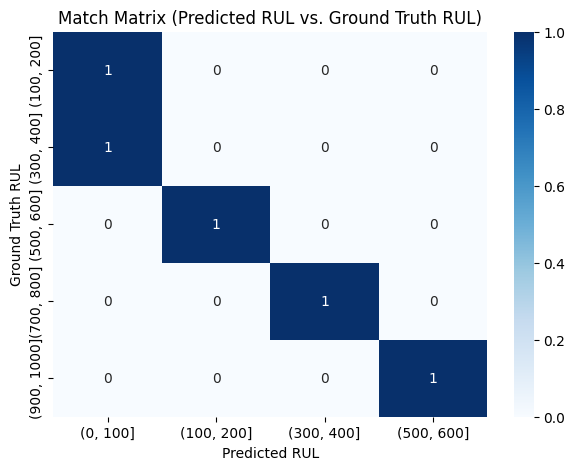

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Provided Data
data = {
    "Bearing": ["Bearing 2_3"] * 5,
    "Prediction Cycle": [301, 521, 721, 921, 1121],
    "Predicted RUL": [516.4, 390.1, 156.2, 37, 43.9],
    "Ground Truth RUL": [902, 702, 502, 302, 102]
}

df = pd.DataFrame(data)

# Define tolerance for a match
tolerance = 50

# Create bins for the match matrix
bins = range(0, 1600, 100)  # Bins for RUL values
df["Predicted Bin"] = pd.cut(df["Predicted RUL"], bins)
df["Ground Truth Bin"] = pd.cut(df["Ground Truth RUL"], bins)

# Create a pivot table (match matrix)
match_matrix = pd.crosstab(df["Ground Truth Bin"], df["Predicted Bin"])

# Visualization of the match matrix
plt.figure(figsize=(7, 5))
sns.heatmap(match_matrix, annot=True, cmap="Blues", fmt="d", cbar=True)
plt.title("Match Matrix (Predicted RUL vs. Ground Truth RUL)")
plt.xlabel("Predicted RUL")
plt.ylabel("Ground Truth RUL")
plt.show()

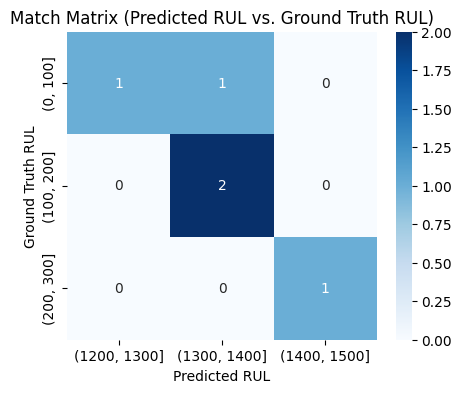

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Provided Data
data = {
    "Bearing": ["Bearing 3_3"] * 6,
    "Prediction Cycle": [101, 161, 211, 261, 311, 352],
    "Predicted RUL": [1535.5, 1476, 1386, 1376, 1326.2, 1284.8],
    "Ground Truth RUL": [252, 202, 152, 102, 52, 12]
}

df = pd.DataFrame(data)

# Define tolerance for a match
tolerance = 50

# Create bins for the match matrix
bins = range(0, 1600, 100)  # Bins for RUL values
df["Predicted Bin"] = pd.cut(df["Predicted RUL"], bins)
df["Ground Truth Bin"] = pd.cut(df["Ground Truth RUL"], bins)

# Create a pivot table (match matrix)
match_matrix = pd.crosstab(df["Ground Truth Bin"], df["Predicted Bin"])

# Visualization of the match matrix
plt.figure(figsize=(5, 4))
sns.heatmap(match_matrix, annot=True, cmap="Blues", fmt="d", cbar=True)
plt.title("Match Matrix (Predicted RUL vs. Ground Truth RUL)")
plt.xlabel("Predicted RUL")
plt.ylabel("Ground Truth RUL")
plt.show()